# Makemore part 1
We introduce the usage of n grams to train a model to produce realistic sounding names given a list of names.

In [1]:
words = open("names.txt", "r").read().split("\n")

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

We shall use PyTorch's tensor to create a 2D array to take note of the occurences of bigrams. Each row will have a character that represents the start of the bigram sequence (index `i`), while the corresponding column of that row will have a character that represents the end of the bigram sequence (index `i+1`).

In addition, we use a special character `.` to denote the start and the end of each name.

In [6]:
set(list(''.join(words)))

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

This verifies that we only have 26 small English characters in our `names.txt`. Thus, our 2D array should be 27 by 27, taking into account the extra special token `.`.

In [7]:
import torch

In [8]:
N = torch.zeros(size=(27, 27), dtype=torch.int32)
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],


Next, we create a mapping from character to integer.

In [9]:
char_to_index = {char: index+1 for index, char in enumerate(sorted(set(''.join(words))))}

In [10]:
char_to_index['.'] = 0 # special token

In [11]:
char_to_index

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

Next, we iterate through each word in the words list to create our bigram.

In [12]:
for word in words:
    word = list('.' + word + '.')
    for i in range(1, len(word)):
        N[char_to_index[word[i-1]], char_to_index[word[i]]] += 1

In [13]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

We want to visualise what this `N` tensor look like.

In [14]:
index_to_char = {index: char for char, index in char_to_index.items()}

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def visualize_bigram_counts(bigram_counts, index_to_char):
    # Convert PyTorch tensor to numpy array
    counts_np = bigram_counts.numpy()
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(15, 15))
    
    # Create the heatmap
    sns.heatmap(counts_np, annot=False, cmap='YlOrRd', ax=ax,
                xticklabels=False, yticklabels=False)
    
    # Add bigram labels to each cell
    for i in range(27):
        for j in range(27):
            char1 = index_to_char[i]
            char2 = index_to_char[j]
            bigram = f'{char1}{char2}'
            count = counts_np[i, j]
            ax.text(j + 0.5, i + 0.5, f'{bigram}\n{count}', 
                    ha='center', va='center', color='black')
    
    # Set title and labels
    plt.title('Bigram Counts Heatmap')
    plt.xlabel('Second Character')
    plt.ylabel('First Character')
    
    # Show the plot
    plt.show()

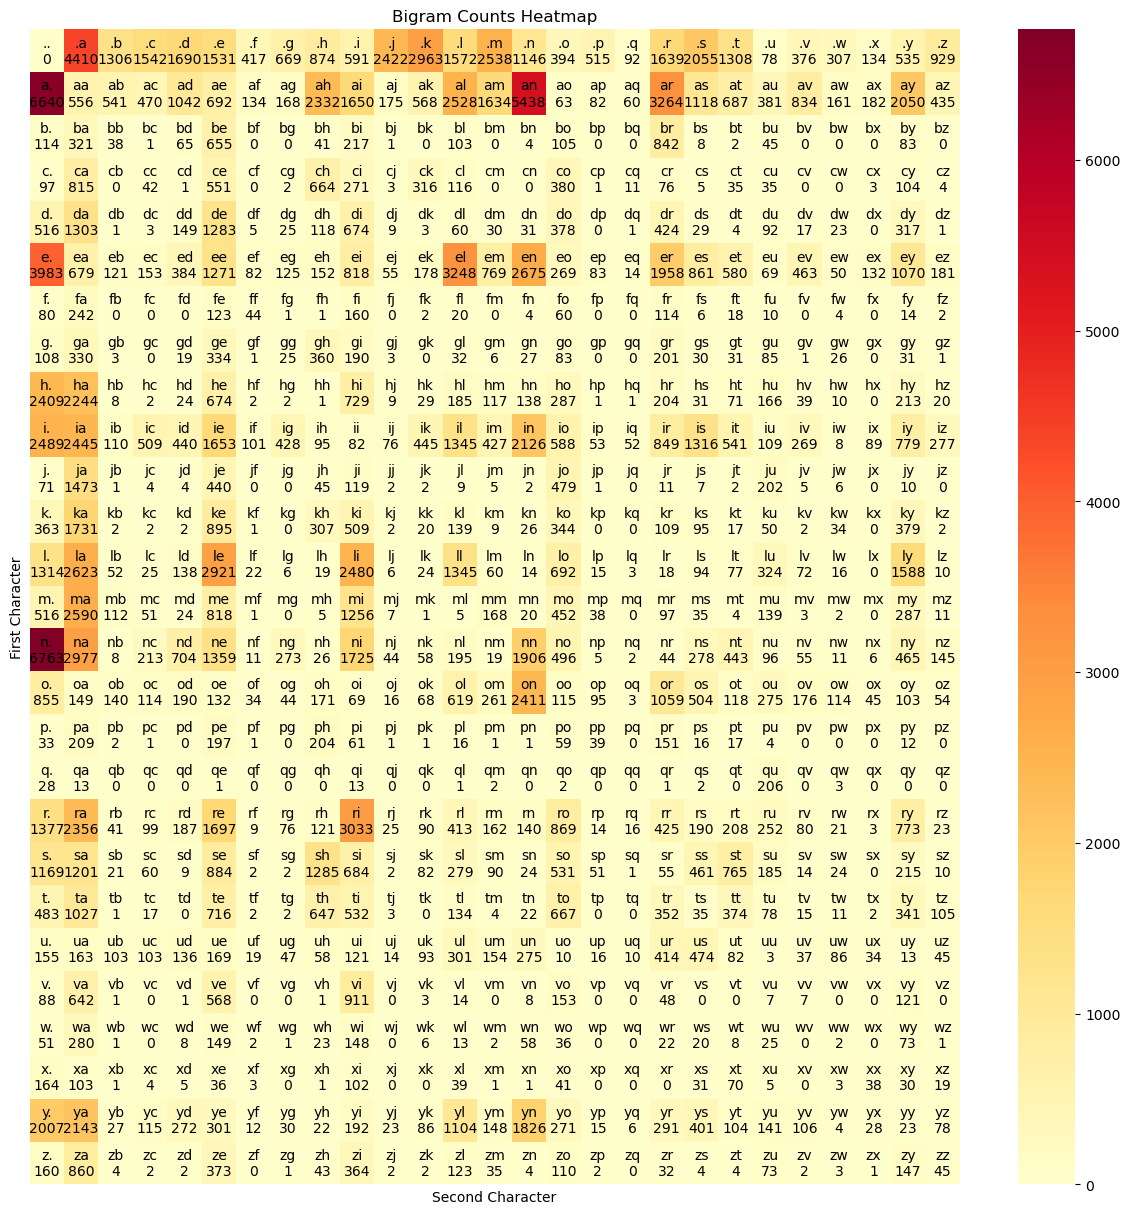

In [17]:
visualize_bigram_counts(N, index_to_char)

Awesome! Now we can calculate the probability distribution of the bigrams to generate some sample words.

In [18]:
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

The code above gives us the probability distribution of a name starting with each character 'a', 'b', 'c', so on and forth.

In [19]:
P = N.float()
P.shape

torch.Size([27, 27])

Next, we will figure out why we need `keepdim=True` in `P.sum(1)`, and why having `keepdim=False` will lead to an error.

In [20]:
P.sum(1).shape, P.sum(1, keepdim=True).shape

(torch.Size([27]), torch.Size([27, 1]))

We notice that there is a difference in dimension where having `keepdim=True` preserves the last dimension. `keepdim=True` is necessary to ensure that broadcasting works properly, i.e. we are duplicating the column vector across the rows, and not the row vector across the columns.

In [21]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [22]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(index_to_char[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


We see that we are generating simple names using the bigram model, although the names are less than ideal.

## Neural net model
After learning the explicit representation of bigrams, we want to use a neural net to simulate the learning. In order to do so, we need both a loss function and training set.

For the loss function, we will use negative log likelihood (nll), as we want to maximise the log likelihood, which is mathematically equivalent to minimising the negative log likelihood.

In [23]:
log_likelihood = 0.0
n = 0

#for w in words:
for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = char_to_index[ch1]
    ix2 = char_to_index[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-27.8672)
nll=tensor(27.8672)
3.4834020137786865


### Creating the training set

In [56]:
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = char_to_index[ch1]
    ix2 = char_to_index[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


number of examples:  228146


In [57]:
import torch.nn.functional as F

In [58]:
# gradient descent
for k in range(100):
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() ## second term is L2 regularisation 
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.768618583679199
3.3788068294525146
3.161090850830078
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146577835083
2.745253801345825
2.7188305854797363
2.696505308151245
2.6773722171783447
2.6608052253723145
2.6463515758514404
2.633665084838867
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886807441711426
2.5822560787200928
2.576429843902588
2.5711236000061035
2.566272735595703
2.5618226528167725
2.5577261447906494
2.5539441108703613
2.5504424571990967
2.5471930503845215
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536262035369873
2.5339579582214355
2.531797409057617
2.529768228530884
2.527860164642334
2.5260636806488037
2.5243709087371826
2.522773265838623
2.52126407623291
2.519836664199829
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137410163879395
2.51269793510437
2.511704921722412
2.5107579231262207
2.509855031967163
2.5089924335479736
2.5081679821014404
2.507380247116089


After playing with different number of iterations, our loss seems to be minimised around 2.4839. Let's print out some names generated by this model.

In [59]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0  # Start with '.'
    while True:
        p = W[ix]
        p = F.softmax(p, dim=0)  # Convert logits to probabilities
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(index_to_char[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.


## Exercises

### E01: Train a trigram model
i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

In [27]:
xs1, xs2, ys = [], [], []
for w in words:
    chs = ['.'] + ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = char_to_index[ch1]
        ix2 = char_to_index[ch2]
        ix3 = char_to_index[ch3]
        xs1.append(ix1)
        xs2.append(ix2)
        ys.append(ix3)
xs1 = torch.tensor(xs1)
xs2 = torch.tensor(xs2)
ys = torch.tensor(ys)
num = xs1.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [28]:
# gradient descent
for k in range(100):
  # forward pass
  # (batch_size, 27)
  xenc1, xenc2 = F.one_hot(xs1, num_classes=27).float(), F.one_hot(xs2, num_classes=27).float()
  # (batch size, 27, 27)
  combined_enc  = torch.einsum('bi, bj -> bij', xenc1, xenc2) # '1' represents that a bigram occurence
  # (batch size, 27)
  logits = torch.einsum('bij,ijk->bk', combined_enc, W) # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() ## second term is L2 regularisation 
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.8028221130371094
3.64870285987854
3.556884765625
3.4891085624694824
3.4331700801849365
3.3840267658233643
3.3398447036743164
3.29964017868042
3.262803554534912
3.2289042472839355
3.1975932121276855
3.1685667037963867
3.1415536403656006
3.1163172721862793
3.0926547050476074
3.0703928470611572
3.0493876934051514
3.0295186042785645
3.01068377494812
2.992795944213867
2.9757814407348633
2.9595749378204346
2.944119453430176
2.9293644428253174
2.915264129638672
2.901777982711792
2.8888683319091797
2.8765010833740234
2.8646445274353027
2.853269338607788
2.842349052429199
2.831857442855835
2.8217711448669434
2.812067985534668
2.8027265071868896
2.793726921081543
2.7850513458251953
2.7766804695129395
2.7685980796813965
2.7607882022857666
2.753236770629883
2.7459299564361572
2.7388527393341064
2.7319955825805664
2.7253448963165283
2.718891143798828
2.7126240730285645
2.7065341472625732
2.700613021850586
2.694852590560913
2.6892452239990234
2.683783531188965
2.6784615516662598
2.6732726097106934

We note that the training loss for trigram model is slightly higher than the bigram model's after 100 training iterations. 

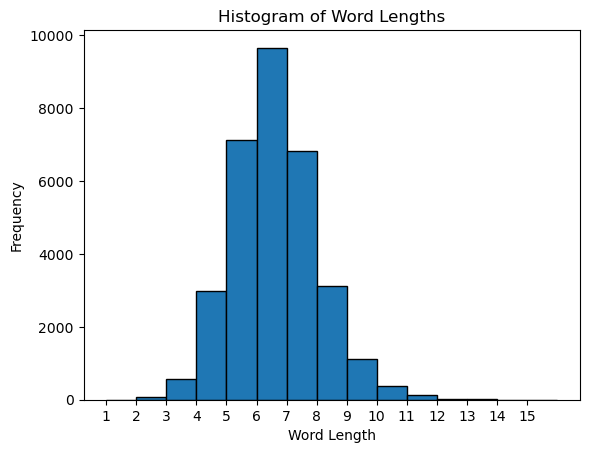

In [29]:
word_lengths = [len(word) for word in words]

plt.hist(word_lengths, bins=range(1, max(word_lengths) + 2), edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Histogram of Word Lengths')
plt.xticks(range(1, max(word_lengths) + 1))
plt.show()

One reason for the trigram model to fare worse than the bigram model is that the names are not that long (most are around 6 characters), so using a trigram captures too big of a context, which leads to 'overfitting'.

### E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. 
Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

#### Bigram model

In [30]:
import random

# Data preparation
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char_to_index[ch1]
        ix2 = char_to_index[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# Shuffle data
indices = list(range(num))
random.shuffle(indices)

# Calculate split indices
train_size = int(0.8 * num)
dev_size = int(0.1 * num)
test_size = num - train_size - dev_size

# Split data
train_indices = indices[:train_size]
dev_indices = indices[train_size:train_size + dev_size]
test_indices = indices[train_size + dev_size:]

xs_train, ys_train = xs[train_indices], ys[train_indices]
xs_dev, ys_dev = xs[dev_indices], ys[dev_indices]
xs_test, ys_test = xs[test_indices], ys[test_indices]

# Initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [31]:
# Gradient descent
for k in range(100):
    # Forward pass for the training set
    xenc_train = F.one_hot(xs_train, num_classes=27).float()  # input to the network: one-hot encoding
    logits_train = xenc_train @ W  # predict log-counts
    counts_train = logits_train.exp()  # counts, equivalent to N
    probs_train = counts_train / counts_train.sum(1, keepdims=True)  # probabilities for next character
    loss_train = -probs_train[torch.arange(train_size), ys_train].log().mean() + 0.01*(W**2).mean()  # Training loss with L2 regularization

    # Forward pass for the development set
    xenc_dev = F.one_hot(xs_dev, num_classes=27).float()  # input to the network: one-hot encoding
    logits_dev = xenc_dev @ W  # predict log-counts
    counts_dev = logits_dev.exp()  # counts, equivalent to N
    probs_dev = counts_dev / counts_dev.sum(1, keepdims=True)  # probabilities for next character
    loss_dev = -probs_dev[torch.arange(dev_size), ys_dev].log().mean()  # Development loss

    # Print the losses
    print(f"Epoch {k+1}, Training Loss: {loss_train.item()}, Development Loss: {loss_dev.item()}")

    # Backward pass
    W.grad = None  # set to zero the gradient
    loss_train.backward()  # only use training loss for the gradient

    # Update
    W.data += -50 * W.grad  # update the weights


Epoch 1, Training Loss: 3.7695720195770264, Development Loss: 3.7552647590637207
Epoch 2, Training Loss: 3.380620002746582, Development Loss: 3.363173484802246
Epoch 3, Training Loss: 3.162900924682617, Development Loss: 3.1437740325927734
Epoch 4, Training Loss: 3.0287699699401855, Development Loss: 3.0088531970977783
Epoch 5, Training Loss: 2.9358909130096436, Development Loss: 2.9156551361083984
Epoch 6, Training Loss: 2.8684756755828857, Development Loss: 2.8482167720794678
Epoch 7, Training Loss: 2.817744493484497, Development Loss: 2.797574043273926
Epoch 8, Training Loss: 2.778102159500122, Development Loss: 2.7580981254577637
Epoch 9, Training Loss: 2.7460970878601074, Development Loss: 2.7262980937957764
Epoch 10, Training Loss: 2.7195794582366943, Development Loss: 2.6999974250793457
Epoch 11, Training Loss: 2.6971771717071533, Development Loss: 2.677804708480835
Epoch 12, Training Loss: 2.6779825687408447, Development Loss: 2.658799886703491
Epoch 13, Training Loss: 2.661369

In [32]:
xenc_test = F.one_hot(xs_test, num_classes=27).float()  # input to the network: one-hot encoding
logits_test = xenc_test @ W  # predict log-counts
counts_test = logits_test.exp()  # counts, equivalent to N
probs_test = counts_test / counts_test.sum(1, keepdims=True)  # probabilities for next character
loss_test = -probs_test[torch.arange(test_size), ys_test].log().mean()  # Test loss

print(f"Test Loss: {loss_test.item()}")

Test Loss: 2.4810502529144287


We see that there is no clear over/underfitting. This is great! The train loss is a little higher when we only use 80% of the data- this could be so as we have less data to train on.

#### Trigram model

In [33]:
xs1, xs2, ys = [], [], []
for w in words:
    chs = ['.'] + ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = char_to_index[ch1]
        ix2 = char_to_index[ch2]
        ix3 = char_to_index[ch3]
        xs1.append(ix1)
        xs2.append(ix2)
        ys.append(ix3)
xs1 = torch.tensor(xs1)
xs2 = torch.tensor(xs2)
ys = torch.tensor(ys)
num = xs1.nelement()
print('number of examples: ', num)

# Shuffle data
indices = list(range(num))
random.shuffle(indices)

# Calculate split indices
train_size = int(0.8 * num)
dev_size = int(0.1 * num)
test_size = num - train_size - dev_size

# Split data
train_indices = indices[:train_size]
dev_indices = indices[train_size:train_size + dev_size]
test_indices = indices[train_size + dev_size:]

xs1_train, xs2_train, ys_train = xs1[train_indices], xs2[train_indices], ys[train_indices]
xs1_dev, xs2_dev, ys_dev = xs1[dev_indices], xs2[dev_indices], ys[dev_indices]
xs1_test, xs2_test, ys_test = xs1[test_indices], xs2[test_indices], ys[test_indices]

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [34]:
# Gradient descent
for k in range(100):
    # Forward pass for the training set
    xenc1_train = F.one_hot(xs1_train, num_classes=27).float()  # One-hot encode first input
    xenc2_train = F.one_hot(xs2_train, num_classes=27).float()  # One-hot encode second input
    combined_enc_train = torch.einsum('bi, bj -> bij', xenc1_train, xenc2_train)  # Combine encodings for bigram occurrence
    logits_train = torch.einsum('bij,ijk->bk', combined_enc_train, W)  # Predict log-counts
    counts_train = logits_train.exp()  # Counts, equivalent to N
    probs_train = counts_train / counts_train.sum(1, keepdims=True)  # Probabilities for the next character
    loss_train = -probs_train[torch.arange(train_size), ys_train].log().mean() + 0.01*(W**2).mean()  # Training loss with L2 regularization

    # Forward pass for the development set
    xenc1_dev = F.one_hot(xs1_dev, num_classes=27).float()  # One-hot encode first input
    xenc2_dev = F.one_hot(xs2_dev, num_classes=27).float()  # One-hot encode second input
    combined_enc_dev = torch.einsum('bi, bj -> bij', xenc1_dev, xenc2_dev)  # Combine encodings for bigram occurrence
    logits_dev = torch.einsum('bij,ijk->bk', combined_enc_dev, W)  # Predict log-counts
    counts_dev = logits_dev.exp()  # Counts, equivalent to N
    probs_dev = counts_dev / counts_dev.sum(1, keepdims=True)  # Probabilities for the next character
    loss_dev = -probs_dev[torch.arange(dev_size), ys_dev].log().mean()  # Development loss

    # Print the losses
    print(f"Epoch {k+1}, Training Loss: {loss_train.item()}, Development Loss: {loss_dev.item()}")

    # Backward pass
    W.grad = None  # Set to zero the gradient
    loss_train.backward()  # Only use training loss for the gradient

    # Update
    W.data += -50 * W.grad  # Update the weights

Epoch 1, Training Loss: 3.8049776554107666, Development Loss: 3.77710223197937
Epoch 2, Training Loss: 3.6502480506896973, Development Loss: 3.6268248558044434
Epoch 3, Training Loss: 3.558138370513916, Development Loss: 3.5367584228515625
Epoch 4, Training Loss: 3.4901492595672607, Development Loss: 3.469984769821167
Epoch 5, Training Loss: 3.4339921474456787, Development Loss: 3.4146857261657715
Epoch 6, Training Loss: 3.384639263153076, Development Loss: 3.366062879562378
Epoch 7, Training Loss: 3.3402717113494873, Development Loss: 3.3223648071289062
Epoch 8, Training Loss: 3.2999062538146973, Development Loss: 3.2826156616210938
Epoch 9, Training Loss: 3.262932538986206, Development Loss: 3.246206521987915
Epoch 10, Training Loss: 3.22891902923584, Development Loss: 3.2127058506011963
Epoch 11, Training Loss: 3.1975114345550537, Development Loss: 3.1817657947540283
Epoch 12, Training Loss: 3.1683998107910156, Development Loss: 3.1530840396881104
Epoch 13, Training Loss: 3.14130973

In [35]:
xenc1_test = F.one_hot(xs1_test, num_classes=27).float()  # One-hot encode first input
xenc2_test = F.one_hot(xs2_test, num_classes=27).float()  # One-hot encode second input
combined_enc_test = torch.einsum('bi, bj -> bij', xenc1_test, xenc2_test)  # Combine encodings for bigram occurrence
logits_test = torch.einsum('bij,ijk->bk', combined_enc_test, W)  # Predict log-counts
counts_test = logits_test.exp()  # Counts, equivalent to N
probs_test = counts_test / counts_test.sum(1, keepdims=True)  # Probabilities for the next character
loss_test = -probs_test[torch.arange(test_size), ys_test].log().mean()  # Test loss

# Print the test loss
print(f"Test Loss: {loss_test.item()}")


Test Loss: 2.5193912982940674


As we can see, the trigram model still fares a little worse than the bigram model.

#### E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model 
try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?

In [36]:
def gradient_descent(num_iterations, l2_reg_parameter):
    for k in range(num_iterations):
        # Forward pass for the training set
        xenc1_train = F.one_hot(xs1_train, num_classes=27).float()  # One-hot encode first input
        xenc2_train = F.one_hot(xs2_train, num_classes=27).float()  # One-hot encode second input
        combined_enc_train = torch.einsum('bi, bj -> bij', xenc1_train, xenc2_train)  # Combine encodings for bigram occurrence
        logits_train = torch.einsum('bij,ijk->bk', combined_enc_train, W)  # Predict log-counts
        counts_train = logits_train.exp()  # Counts, equivalent to N
        probs_train = counts_train / counts_train.sum(1, keepdims=True)  # Probabilities for the next character
        loss_train = -probs_train[torch.arange(train_size), ys_train].log().mean() + l2_reg_parameter*(W**2).mean()  # Training loss with L2 regularization

        # Forward pass for the development set
        xenc1_dev = F.one_hot(xs1_dev, num_classes=27).float()  # One-hot encode first input
        xenc2_dev = F.one_hot(xs2_dev, num_classes=27).float()  # One-hot encode second input
        combined_enc_dev = torch.einsum('bi, bj -> bij', xenc1_dev, xenc2_dev)  # Combine encodings for bigram occurrence
        logits_dev = torch.einsum('bij,ijk->bk', combined_enc_dev, W)  # Predict log-counts
        counts_dev = logits_dev.exp()  # Counts, equivalent to N
        probs_dev = counts_dev / counts_dev.sum(1, keepdims=True)  # Probabilities for the next character
        loss_dev = -probs_dev[torch.arange(dev_size), ys_dev].log().mean()  # Development loss

        # Backward pass
        W.grad = None  # Set to zero the gradient
        loss_train.backward()  # Only use training loss for the gradient

        # Update
        W.data += -50 * W.grad  # Update the weights

    # Print the losses
    print(f"Epoch {k+1}, Training Loss: {loss_train.item()}, Development Loss: {loss_dev.item()}")

    return loss_train.item(), loss_dev.item()

Epoch 100, Training Loss: 2.379067897796631, Development Loss: 2.3984858989715576
Epoch 100, Training Loss: 2.3249034881591797, Development Loss: 2.347960948944092
Epoch 100, Training Loss: 2.294696807861328, Development Loss: 2.320255994796753
Epoch 100, Training Loss: 2.27640438079834, Development Loss: 2.302835702896118
Epoch 100, Training Loss: 2.2741124629974365, Development Loss: 2.2910618782043457
Epoch 100, Training Loss: 2.368994951248169, Development Loss: 2.2848775386810303
Epoch 100, Training Loss: 2.804569721221924, Development Loss: 2.337899684906006
Epoch 100, Training Loss: 2.973125696182251, Development Loss: 2.8017001152038574
Epoch 100, Training Loss: 3.2359564304351807, Development Loss: 3.1862545013427734


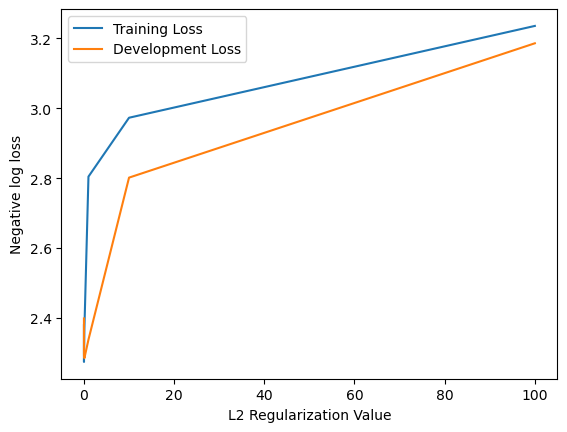

In [37]:
l2_regularization_values = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

train_losses, dev_losses = [], []
for l2_reg_val in l2_regularization_values:
    train_loss, dev_loss = gradient_descent(100, l2_reg_val)
    train_losses.append(train_loss)
    dev_losses.append(dev_loss)

plt.plot(l2_regularization_values, train_losses, label='Training Loss')
plt.plot(l2_regularization_values, dev_losses, label='Development Loss')

plt.xlabel('L2 Regularization Value')
plt.ylabel('Negative log loss')
plt.legend()
plt.show()

It seems like the lowest negative log loss on the dev set occurs when regularisation term is `1e-1`. Let's train the model using that regularisation value and see the loss on the test set.

In [38]:
for k in range(100):
    # Forward pass for the training set
    xenc1_train = F.one_hot(xs1_train, num_classes=27).float()  # One-hot encode first input
    xenc2_train = F.one_hot(xs2_train, num_classes=27).float()  # One-hot encode second input
    combined_enc_train = torch.einsum('bi, bj -> bij', xenc1_train, xenc2_train)  # Combine encodings for bigram occurrence
    logits_train = torch.einsum('bij,ijk->bk', combined_enc_train, W)  # Predict log-counts
    counts_train = logits_train.exp()  # Counts, equivalent to N
    probs_train = counts_train / counts_train.sum(1, keepdims=True)  # Probabilities for the next character
    loss_train = -probs_train[torch.arange(train_size), ys_train].log().mean() + 1e-1 * (W**2).mean()  # Training loss with L2 regularization

    # Forward pass for the development set
    xenc1_dev = F.one_hot(xs1_dev, num_classes=27).float()  # One-hot encode first input
    xenc2_dev = F.one_hot(xs2_dev, num_classes=27).float()  # One-hot encode second input
    combined_enc_dev = torch.einsum('bi, bj -> bij', xenc1_dev, xenc2_dev)  # Combine encodings for bigram occurrence
    logits_dev = torch.einsum('bij,ijk->bk', combined_enc_dev, W)  # Predict log-counts
    counts_dev = logits_dev.exp()  # Counts, equivalent to N
    probs_dev = counts_dev / counts_dev.sum(1, keepdims=True)  # Probabilities for the next character
    loss_dev = -probs_dev[torch.arange(dev_size), ys_dev].log().mean()  # Development loss

    # Backward pass
    W.grad = None  # Set to zero the gradient
    loss_train.backward()  # Only use training loss for the gradient

    # Update
    W.data += -50 * W.grad  # Update the weights

In [39]:
xenc1_test = F.one_hot(xs1_test, num_classes=27).float()  # One-hot encode first input
xenc2_test = F.one_hot(xs2_test, num_classes=27).float()  # One-hot encode second input
combined_enc_test = torch.einsum('bi, bj -> bij', xenc1_test, xenc2_test)  # Combine encodings for bigram occurrence
logits_test = torch.einsum('bij,ijk->bk', combined_enc_test, W)  # Predict log-counts
counts_test = logits_test.exp()  # Counts, equivalent to N
probs_test = counts_test / counts_test.sum(1, keepdims=True)  # Probabilities for the next character
loss_test = -probs_test[torch.arange(test_size), ys_test].log().mean()  # Test loss

# Print the test loss
print(f"Test Loss: {loss_test.item()}")

Test Loss: 2.434987783432007


We got a test loss of 2.418, which is lower than our earlier value.

#### E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful
Can you delete our use of F.one_hot in favor of simply indexing into rows of W?

In [40]:
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = char_to_index[ch1]
    ix2 = char_to_index[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [41]:
# gradient descent
for k in range(100):
  # forward pass
  logits = W[xs]
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() ## second term is L2 regularisation 
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.768618583679199
3.378788471221924
3.161080837249756
3.027181386947632
2.9344804286956787
2.8672285079956055
2.816653251647949
2.777146100997925
2.745253801345825
2.7188308238983154
2.696505546569824
2.677372694015503
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037065982818604
2.595794439315796
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711233615875244
2.566272735595703
2.5618226528167725
2.5577263832092285
2.5539441108703613
2.5504424571990967
2.5471925735473633
2.5441696643829346
2.5413522720336914
2.538721799850464
2.536262273788452
2.5339579582214355
2.531797409057617
2.5297679901123047
2.527860164642334
2.5260636806488037
2.5243704319000244
2.522773265838623
2.52126407623291
2.519836664199829
2.5184857845306396
2.517205238342285
2.515990972518921
2.5148372650146484
2.5137407779693604
2.512697696685791
2.511704444885254
2.5107581615448
2.509854793548584
2.5089924335479736
2.5081686973571777
2.507380247116089
2.50

#### E05 look up and use F.cross_entropy instead

In [42]:
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = char_to_index[ch1]
    ix2 = char_to_index[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [43]:
# gradient descent
for k in range(100):
  # forward pass
  loss = F.cross_entropy(W[xs], ys)
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.758953332901001
3.3710827827453613
3.1540334224700928
3.02036714553833
2.9277074337005615
2.8603999614715576
2.809727191925049
2.77010178565979
2.738072633743286
2.711496353149414
2.6890032291412354
2.6696882247924805
2.6529300212860107
2.638277053833008
2.62538743019104
2.613990545272827
2.603863000869751
2.5948216915130615
2.586712121963501
2.579403877258301
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562589168548584
2.551633596420288
2.547366142272949
2.5434155464172363
2.5397486686706543
2.536336660385132
2.5331544876098633
2.5301806926727295
2.5273969173431396
2.5247862339019775
2.522334575653076
2.520029067993164
2.5178580284118652
2.515810966491699
2.513878345489502
2.512052059173584
2.510324239730835
2.5086872577667236
2.5071349143981934
2.5056614875793457
2.5042612552642822
2.502929210662842
2.5016608238220215
2.5004522800445557
2.4992990493774414
2.4981977939605713
2.497144937515259
2.496137857437134
2.495173931121826
2.4942495822906494
2.493363618850708
2.49

The code is so much cleaner when we use cross entropy loss.

#### E06: Meta-exercise! How would a quad-gram model fare? 
We see that there are many words that are more than 4 characters. Using a longer n-gram could better capture those longer names at the expense of shorter names.

In [44]:
xs, ys = [], []
for w in words:
    chs = ['.'] * 3 + list(w) + ['.']
    for ch1, ch2, ch3, ch4 in zip(chs, chs[1:], chs[2:], chs[3:]):
        ix1 = char_to_index[ch1]
        ix2 = char_to_index[ch2]
        ix3 = char_to_index[ch3]
        ix4 = char_to_index[ch4]
        xs.append((ix1, ix2, ix3))
        ys.append(ix4)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.shape[0]
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27, 27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [47]:
xs[:3]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13]])

In [50]:
W[xs[:,0], xs[:,1], xs[:,2]].shape

torch.Size([228146, 27])

In [51]:
ys.shape

torch.Size([228146])

In [53]:
batch_size = 256

dataset = torch.utils.data.TensorDataset(xs, ys)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# gradient descent
for epoch in range(25):
    total_loss = 0
    for batch_xs, batch_ys in dataloader:
        # forward pass
        logits = W[batch_xs[:,0], batch_xs[:,1], batch_xs[:,2]]
        loss = F.cross_entropy(logits, batch_ys)
        total_loss += loss.item() * batch_xs.size(0)
        
        # backward pass
        W.grad = None  # set to zero the gradient
        loss.backward()
        
        # update
        W.data += -50 * W.grad
    
    # Print average loss for the epoch
    avg_loss = total_loss / len(dataset)
    print(f'Epoch {epoch+1}, Average Loss: {avg_loss:.4f}')

Epoch 1, Average Loss: 2.0025
Epoch 2, Average Loss: 1.9967
Epoch 3, Average Loss: 1.9906
Epoch 4, Average Loss: 1.9869
Epoch 5, Average Loss: 1.9829
Epoch 6, Average Loss: 1.9791
Epoch 7, Average Loss: 1.9759
Epoch 8, Average Loss: 1.9730
Epoch 9, Average Loss: 1.9709
Epoch 10, Average Loss: 1.9680
Epoch 11, Average Loss: 1.9659
Epoch 12, Average Loss: 1.9647
Epoch 13, Average Loss: 1.9626
Epoch 14, Average Loss: 1.9609
Epoch 15, Average Loss: 1.9604
Epoch 16, Average Loss: 1.9581
Epoch 17, Average Loss: 1.9573
Epoch 18, Average Loss: 1.9571
Epoch 19, Average Loss: 1.9555
Epoch 20, Average Loss: 1.9553
Epoch 21, Average Loss: 1.9540
Epoch 22, Average Loss: 1.9529
Epoch 23, Average Loss: 1.9526
Epoch 24, Average Loss: 1.9519
Epoch 25, Average Loss: 1.9507


The loss actually seems lower! Let's try to create some names using this 4-gram model to see how it actually fares.

In [55]:
g = torch.Generator().manual_seed(2147483647)

for i in range(15):
    out = []
    ix1, ix2, ix3 = 0, 0, 0  # Start with '...'
    while True:
        p = W[ix1, ix2, ix3]
        p = F.softmax(p, dim=0)  # Convert logits to probabilities
        ix4 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(index_to_char[ix4])
        if ix4 == 0:
            break
        ix1, ix2, ix3 = ix2, ix3, ix4
    print(''.join(out))

celi.
mirah.
mikiyah.
tyhir.
maima.
taine.
kays.
katha.
samiyah.
javari.
mias.
moriel.
kaus.
evando.
kaley.


I actually really like the names generated from this 4-gram model! They also look aesthetically better than the bigram.